In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import io

INTERNET_KULLANIM_AMACLARI_JSON = """[
  {"Amaç": "İnternet üzerinden video izleme", "Yüzde": 83.9},
  {"Amaç": "Ödev, öğrenme veya çevrimiçi derslere katılma", "Yüzde": 75.0},
  {"Amaç": "Oyun oynama veya oyun indirme", "Yüzde": 72.7},
  {"Amaç": "Sosyal medya", "Yüzde": 72.6},
  {"Amaç": "Müzik dinleme veya müzik indirme", "Yüzde": 68.1},
  {"Amaç": "Mesajlaşma", "Yüzde": 65.2},
  {"Amaç": "Mal veya hizmetler hakkında bilgi arama", "Yüzde": 45.6},
  {"Amaç": "İnternet üzerinden alışveriş yapma", "Yüzde": 14.7},
  {"Amaç": "E-posta gönderme/alma", "Yüzde": 13.2}
]
"""
CEP_TELEFONU_KULLANIM_AMACLARI_JSON = """[
  {"Amaç": "İnternette gezinme", "6-10 Yaş": 77.9, "11-15 Yaş": 88.8, "6-15 Yaş": 87.2},
  {"Amaç": "Konuşma (görüntülü veya sesli)", "6-10 Yaş": 77.3, "11-15 Yaş": 64.0, "6-15 Yaş": 64.5},
  {"Amaç": "Film/dizi, TV yayınları veya video izleme", "6-10 Yaş": 75.0, "11-15 Yaş": 77.9, "6-15 Yaş": 77.3},
  {"Amaç": "Sosyal medya", "6-10 Yaş": 60.2, "11-15 Yaş": 73.6, "6-15 Yaş": 72.6},
  {"Amaç": "Oyun oynama (çevrimiçi/dışı)", "6-10 Yaş": 72.5, "11-15 Yaş": 78.6, "6-15 Yaş": 77.6},
  {"Amaç": "Ders çalışma, ödev/sunum hazırlama", "6-10 Yaş": 71.2, "11-15 Yaş": 69.8, "6-15 Yaş": 70.8},
  {"Amaç": "Müzik dinleme", "6-10 Yaş": 61.7, "11-15 Yaş": 82.5, "6-15 Yaş": 69.8},
  {"Amaç": "Mesajlaşma", "6-10 Yaş": 44.2, "11-15 Yaş": 87.9, "6-15 Yaş": 69.2},
  {"Amaç": "Çevrimiçi denetime katılma", "6-10 Yaş": 15.6, "11-15 Yaş": 12.0, "6-15 Yaş": 15.4}
]
"""

df_internet = pd.read_json(io.StringIO(INTERNET_KULLANIM_AMACLARI_JSON))
df_telefon = pd.read_json(io.StringIO(CEP_TELEFONU_KULLANIM_AMACLARI_JSON))

print("İnternet Verisinin İlk 5 Satırı:")
print(df_internet.head())
print("\nTelefon Verisinin İlk 5 Satırı:")
print(df_telefon.head())




İnternet Verisinin İlk 5 Satırı:
                                            Amaç  Yüzde
0                İnternet üzerinden video izleme   83.9
1  Ödev, öğrenme veya çevrimiçi derslere katılma   75.0
2                  Oyun oynama veya oyun indirme   72.7
3                                   Sosyal medya   72.6
4               Müzik dinleme veya müzik indirme   68.1

Telefon Verisinin İlk 5 Satırı:
                                        Amaç  6-10 Yaş  11-15 Yaş  6-15 Yaş
0                         İnternette gezinme      77.9       88.8      87.2
1             Konuşma (görüntülü veya sesli)      77.3       64.0      64.5
2  Film/dizi, TV yayınları veya video izleme      75.0       77.9      77.3
3                               Sosyal medya      60.2       73.6      72.6
4               Oyun oynama (çevrimiçi/dışı)      72.5       78.6      77.6


In [2]:
# df_internet için Temel İstatistikler (Yüzde Sütunu)
print("### İnternet Kullanım Amaçları: Temel İstatistikler (Yüzde) ###")
# describe() metodu ortalama (mean), standart sapma (std), min/max değerlerini verir
print(df_internet['Yüzde'].describe())

# df_telefon için Temel İstatistikler (Yaş Grupları)
print("\n### Cep Telefonu Kullanım Amaçları: Yaş Grupları İstatistikleri ###")
print(df_telefon[['6-10 Yaş', '11-15 Yaş', '6-15 Yaş']].describe())

# Eksik Veri Kontrolü (Hızlı Kontrol)
print("\n### Eksik Veri Kontrolü (df_telefon) ###")
print(df_telefon.isnull().sum())

### İnternet Kullanım Amaçları: Temel İstatistikler (Yüzde) ###
count     9.000000
mean     56.777778
std      26.375072
min      13.200000
25%      45.600000
50%      68.100000
75%      72.700000
max      83.900000
Name: Yüzde, dtype: float64

### Cep Telefonu Kullanım Amaçları: Yaş Grupları İstatistikleri ###
        6-10 Yaş  11-15 Yaş   6-15 Yaş
count   9.000000   9.000000   9.000000
mean   61.733333  70.566667  67.155556
std    20.381609  23.389581  20.474259
min    15.600000  12.000000  15.400000
25%    60.200000  69.800000  69.200000
50%    71.200000  77.900000  70.800000
75%    75.000000  82.500000  77.300000
max    77.900000  88.800000  87.200000

### Eksik Veri Kontrolü (df_telefon) ###
Amaç         0
6-10 Yaş     0
11-15 Yaş    0
6-15 Yaş     0
dtype: int64


### Yaş Grupları Arası Kullanım Yüzdesi Korelasyon Matrisi ###
           6-10 Yaş  11-15 Yaş  6-15 Yaş
6-10 Yaş   1.000000   0.724221  0.870967
11-15 Yaş  0.724221   1.000000  0.953538
6-15 Yaş   0.870967   0.953538  1.000000


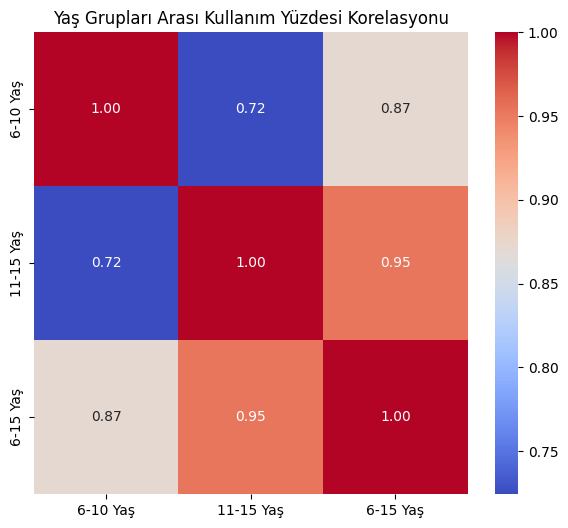

In [3]:
# Korelasyon matrisi hesaplama (yaş grupları arasında)
korelasyon_telefon = df_telefon[['6-10 Yaş', '11-15 Yaş', '6-15 Yaş']].corr()
print("### Yaş Grupları Arası Kullanım Yüzdesi Korelasyon Matrisi ###")
print(korelasyon_telefon)

# Korelasyon Matrisi Görselleştirmesi (Heatmap) 
plt.figure(figsize=(7, 6))
sns.heatmap(korelasyon_telefon, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Yaş Grupları Arası Kullanım Yüzdesi Korelasyonu')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3984\840701046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Yüzde', y='Amaç', data=df_sorted, palette='viridis')


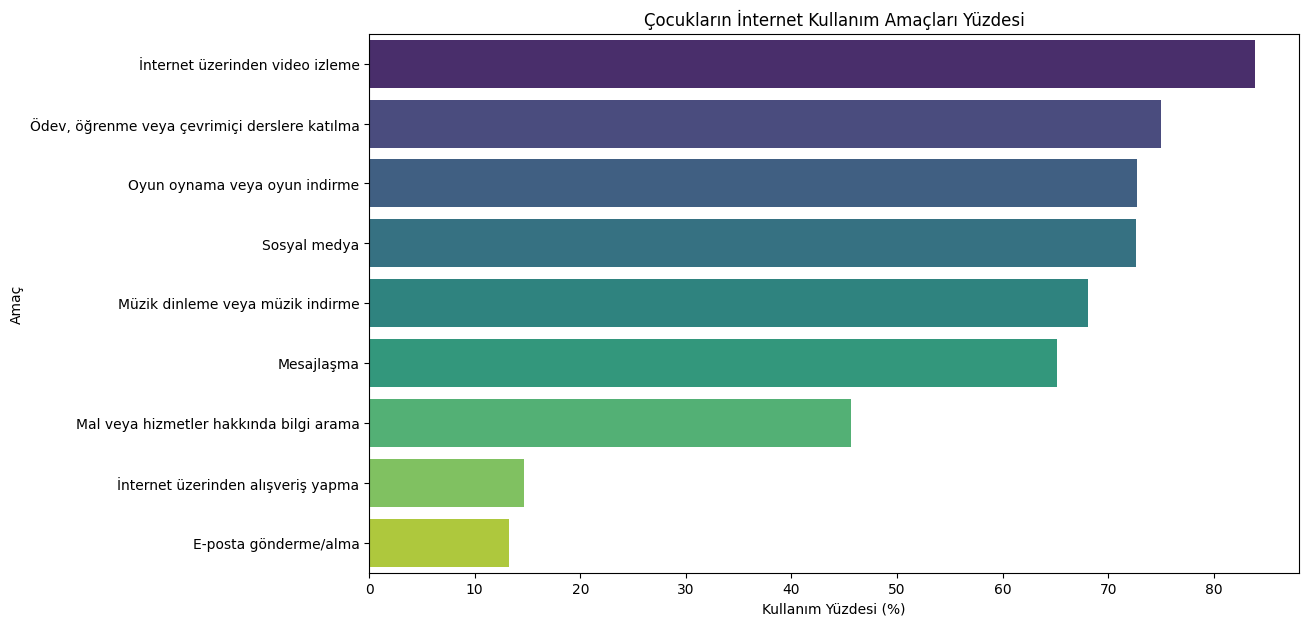

In [4]:
plt.figure(figsize=(12, 7))
# Yüzde değerine göre büyükten küçüğe sıralıyoruz
df_sorted = df_internet.sort_values(by='Yüzde', ascending=False)
sns.barplot(x='Yüzde', y='Amaç', data=df_sorted, palette='viridis') 
plt.title('Çocukların İnternet Kullanım Amaçları Yüzdesi')
plt.xlabel('Kullanım Yüzdesi (%)')
plt.ylabel('Amaç')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3984\1490797553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Yaş Grubu', y='Kullanım Yüzdesi', data=df_telefon_uzun, palette='Set2')


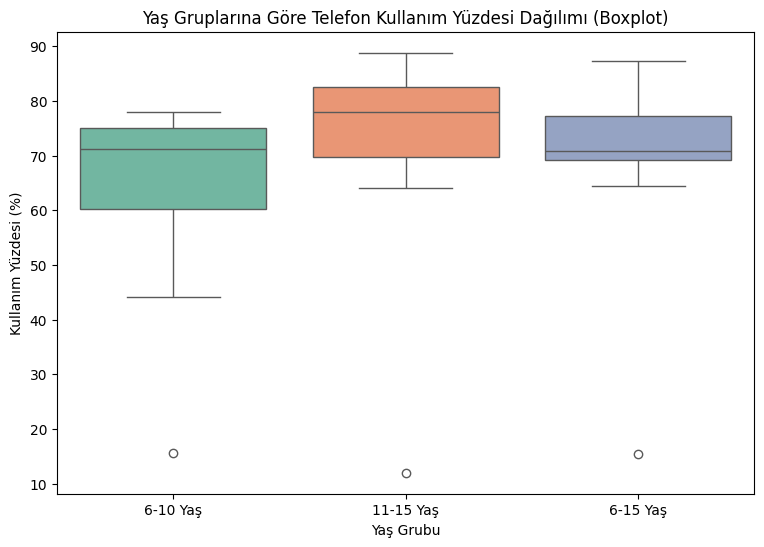

In [7]:
# Telefon verisini uzun formata çevirme (Boxplot için bu adım zorunludur)
df_telefon_uzun = df_telefon.melt(id_vars='Amaç', 
                                  value_vars=['6-10 Yaş', '11-15 Yaş', '6-15 Yaş'],
                                  var_name='Yaş Grubu', 
                                  value_name='Kullanım Yüzdesi')

plt.figure(figsize=(9, 6))

# Boxplot oluşturma. palette parametresi uyarı verirse kaldırabilirsiniz:
# sns.boxplot(x='Yaş Grubu', y='Kullanım Yüzdesi', data=df_telefon_uzun) 
sns.boxplot(x='Yaş Grubu', y='Kullanım Yüzdesi', data=df_telefon_uzun, palette='Set2') 

plt.title('Yaş Gruplarına Göre Telefon Kullanım Yüzdesi Dağılımı (Boxplot)')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kullanım Yüzdesi (%)')
plt.show()

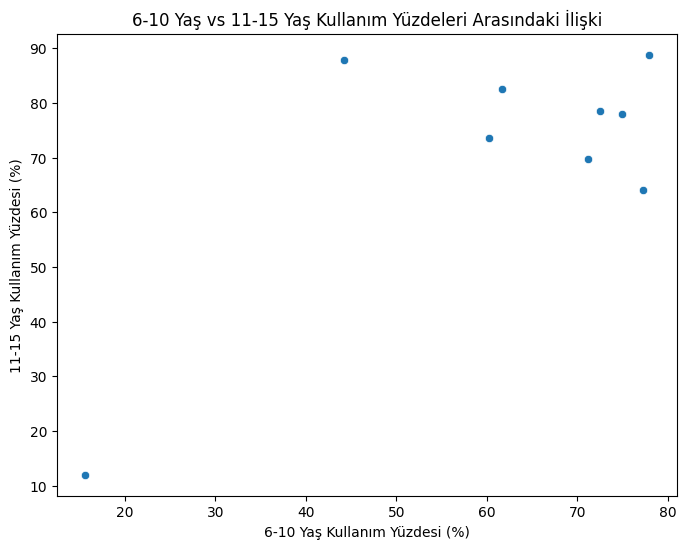

In [6]:
# Scatter Plot: 6-10 yaş grubu kullanımı ile 11-15 yaş grubu kullanımı arasındaki ilişki
plt.figure(figsize=(8, 6))
# Her nokta, bir kullanım amacını (örneğin Oyun Oynama) temsil eder
sns.scatterplot(data=df_telefon, x='6-10 Yaş', y='11-15 Yaş') 
plt.title('6-10 Yaş vs 11-15 Yaş Kullanım Yüzdeleri Arasındaki İlişki')
plt.xlabel('6-10 Yaş Kullanım Yüzdesi (%)')
plt.ylabel('11-15 Yaş Kullanım Yüzdesi (%)')
plt.show()

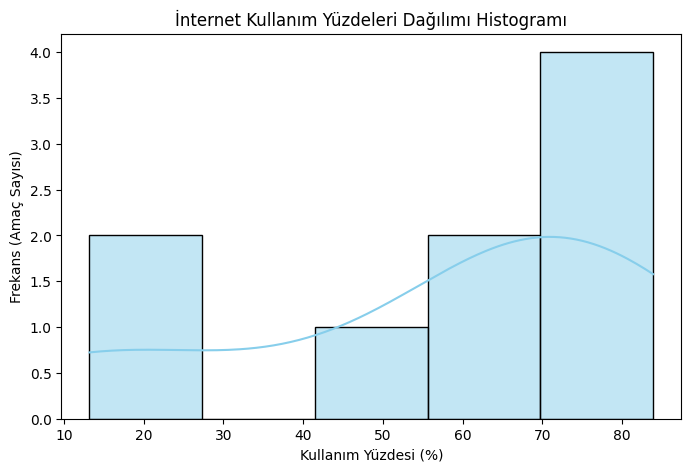

In [8]:
# df_internet veri setindeki 'Yüzde' sütunu için histogram oluşturma
plt.figure(figsize=(8, 5))
# bins=5: Veri aralığını 5 parçaya böler (küçük bir veri seti için yeterlidir)
# kde=True: Opsiyonel olarak yoğunluk tahmini çizgisini ekler
sns.histplot(data=df_internet, x='Yüzde', bins=5, kde=True, color='skyblue') 
plt.title('İnternet Kullanım Yüzdeleri Dağılımı Histogramı')
plt.xlabel('Kullanım Yüzdesi (%)')
plt.ylabel('Frekans (Amaç Sayısı)')
plt.show()